# Assignment 7

*(Due Saturday, November 2, 2019 at noon.)*

1) Load either your dataset, `brfss`, or `nhis` and create at least three derived fields from the data there. Ideally, these will be fields you'll need for your final project.

I included my code from last week as I already made several derived fields. I was going to count those as two and then have a more complex code following. Mainly, I separated what was the OCCURRED_ON_DATE into separate date, day, moth, year, and time columns as well as ordinal year to make it easy to see what day was the one with the most. I also had to conver lat and long into a numerical number as they were seen as strings in order to do the next part of my code.

In [55]:
import numpy as np
import pandas as pd
import datetime as dt

bostoncrime = pd.read_excel('../dataset/crime1yr.xlsx', sheet_name=0)
bostoncrime = bostoncrime.drop(["YEAR", "MONTH", "HOUR","Location"], axis=1)
bostoncrime = bostoncrime.fillna('-')
pd.to_datetime(bostoncrime.OCCURRED_ON_DATE)
bostoncrime['DATE'] = [d.date() for d in bostoncrime['OCCURRED_ON_DATE']]
bostoncrime['DAY'] = pd.DatetimeIndex(bostoncrime['DATE']).day
bostoncrime['MONTH'] = pd.DatetimeIndex(bostoncrime['DATE']).month
bostoncrime['YEAR'] = pd.DatetimeIndex(bostoncrime['DATE']).year
bostoncrime['ORDINAL_DAY'] = [d.toordinal() for d in bostoncrime['DATE']]
bostoncrime['TIME'] = [d.time() for d in bostoncrime['OCCURRED_ON_DATE']]
bostoncrime = bostoncrime.drop(["OCCURRED_ON_DATE"], axis=1)
bostoncrime['Long'] = pd.to_numeric(bostoncrime['Long'],errors='coerce')
bostoncrime['Lat'] = pd.to_numeric(bostoncrime['Lat'],errors='coerce')

#There are random values of 1 or 0 that need to be removed (entire row)

# Get names of indexes for which column Lat has value less than 42
indexLat = bostoncrime[bostoncrime['Lat'] < 42].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexLat, inplace=True)

# Get names of indexes for which column Long has value greater -70
indexLong = bostoncrime[bostoncrime['Long'] > -70].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexLong, inplace=True)

bostoncrime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DATE,DAY,MONTH,YEAR,ORDINAL_DAY,TIME
0,I182070933,724,Auto Theft,AUTO THEFT,B2,330,-,Monday,Part One,NORMANDY ST,42.306072,-71.082733,2018-09-03,3,9,2018,736940,21:25:00
1,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,-,Monday,Part Three,NEWCOMB ST,42.334182,-71.078664,2018-09-03,3,9,2018,736940,21:16:00
2,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,-,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,2018-09-03,3,9,2018,736940,21:09:00
3,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,-,Monday,Part Three,DELHI ST,42.275365,-71.090361,2018-09-03,3,9,2018,736940,21:05:00
4,I182070931,301,Robbery,ROBBERY - STREET,C6,177,-,Monday,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,2018-09-03,3,9,2018,736940,20:48:00


So here, I am attempting to map where the crime is taking place using the lat/long points and a boston city map shapefile

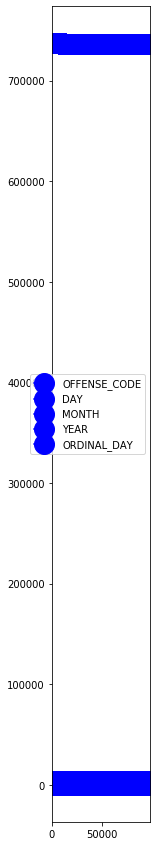

In [56]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

%matplotlib inline

#import map of boston from shape file
boston_map = gpd.read_file('../dataset/Wards/Wards.shp')

#specify coordinate referece system as lat/long points
crs = {'init': 'epsg:4326'}

#create points using longitude and latitude
geometry = [Point(xy) for xy in zip(bostoncrime['Long'], bostoncrime['Lat'])]

#make a geometry column to use for plotting
geo_bostoncrime = gpd.GeoDataFrame(bostoncrime, crs=crs, geometry=geometry)

#No longer need lat/long columns
geo_bostoncrime = bostoncrime.drop(["Long","Lat"], axis=1)

geo_bostoncrime.head()

#plot the map
fig,ax = plt.subplots(figsize = (15,15))
boston_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_bostoncrime.plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Location of a committed crime")


This code will add a base map with labels under the polygon shape

In [59]:
geo_bostoncrime["geometry"] = geo_bostoncrime["geometry]".to_crs(epsg=3857)

import contextily as ctx

ax = geo_bostoncrime.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

SyntaxError: invalid syntax (<ipython-input-59-f72869bcd5db>, line 3)

2) Run the following cell.

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

#### Submitting

In the Terminal (Mac) or Git Bash (Windows):

`git commit -a -m 'Assignment 7 completed'`  
`git push`

### Reading

1. [_Python for Data Analysis_](https://uri-primo.hosted.exlibrisgroup.com/permalink/f/10nopmq/01URI_ALMA51209454630002396):
    * Chapter 9